# Set up

In [1]:
# import package
import matplotlib.pyplot as plt

In [2]:
# !mkdir -p /data/sets/nuimages  # Make the directory to store the nuImages dataset in.

# !wget https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz  # Download the nuImages mini split.

# !tar -xf nuimages-v1.0-mini.tgz -C /data/sets/nuimages  # Uncompress the nuImages mini split.

# !pip install nuscenes-devkit &> /dev/null  # Install nuImages.

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from nuimages import NuImages

nuim = NuImages(dataroot='/data/sets/nuimages', version='v1.0-mini', verbose=True, lazy=True)

Loading nuImages tables for version v1.0-mini...
Done loading in 0.000 seconds (lazy=True).


# Explore the data

Get a **keyframe** from the `sample` table. All instances of sample would be keyframe aka annotated images (not entirely sure, to be tested)

In [21]:
sample = nuim.sample[10]
sample

{'token': '159ffc235add4c0ab7e43ab8e7ba69ae',
 'timestamp': 1530772754897633,
 'log_token': 'f84bdad06ff243369f51e92cbbac82bf',
 'key_camera_token': 'da43cd794238495ebf7835889dbe703e'}

Accessing its `key_camera_token` would reveal the image and its related information.

To view this information, look up the `key_camera_token` in the `sample_data` table.

In [23]:
detailed_sample = nuim.get('sample_data', sample['key_camera_token'])
detailed_sample

{'token': 'da43cd794238495ebf7835889dbe703e',
 'sample_token': '159ffc235add4c0ab7e43ab8e7ba69ae',
 'ego_pose_token': '4439228a9e9142cebc1b63b0c25d2432',
 'calibrated_sensor_token': 'd0c75b70a67854f8bbbb99a742d23974',
 'filename': 'samples/CAM_BACK_LEFT/n010-2018-07-05-14-36-33+0800__CAM_BACK_LEFT__1530772754897633.jpg',
 'fileformat': 'jpg',
 'width': 1600,
 'height': 900,
 'timestamp': 1530772754897633,
 'is_key_frame': True,
 'prev': '9f9b35b289b24d89a1650bf2c1ab14c8',
 'next': '01d634b4883242cb8bc6ac8f7cfd7f47'}

As we can see, the image is the keyframe.

Each **keyframe** will be accompanied by various **non-key frame**. Essentially, those frames are images immediately before or after the **keyframe**, hence the variable name `prev` and `next`.

Loaded 58 surface_ann(s) in 0.012s,
Loaded 25 category(s) in 0.006s,
Loaded 506 object_ann(s) in 0.010s,
Loaded 12 attribute(s) in 0.002s,


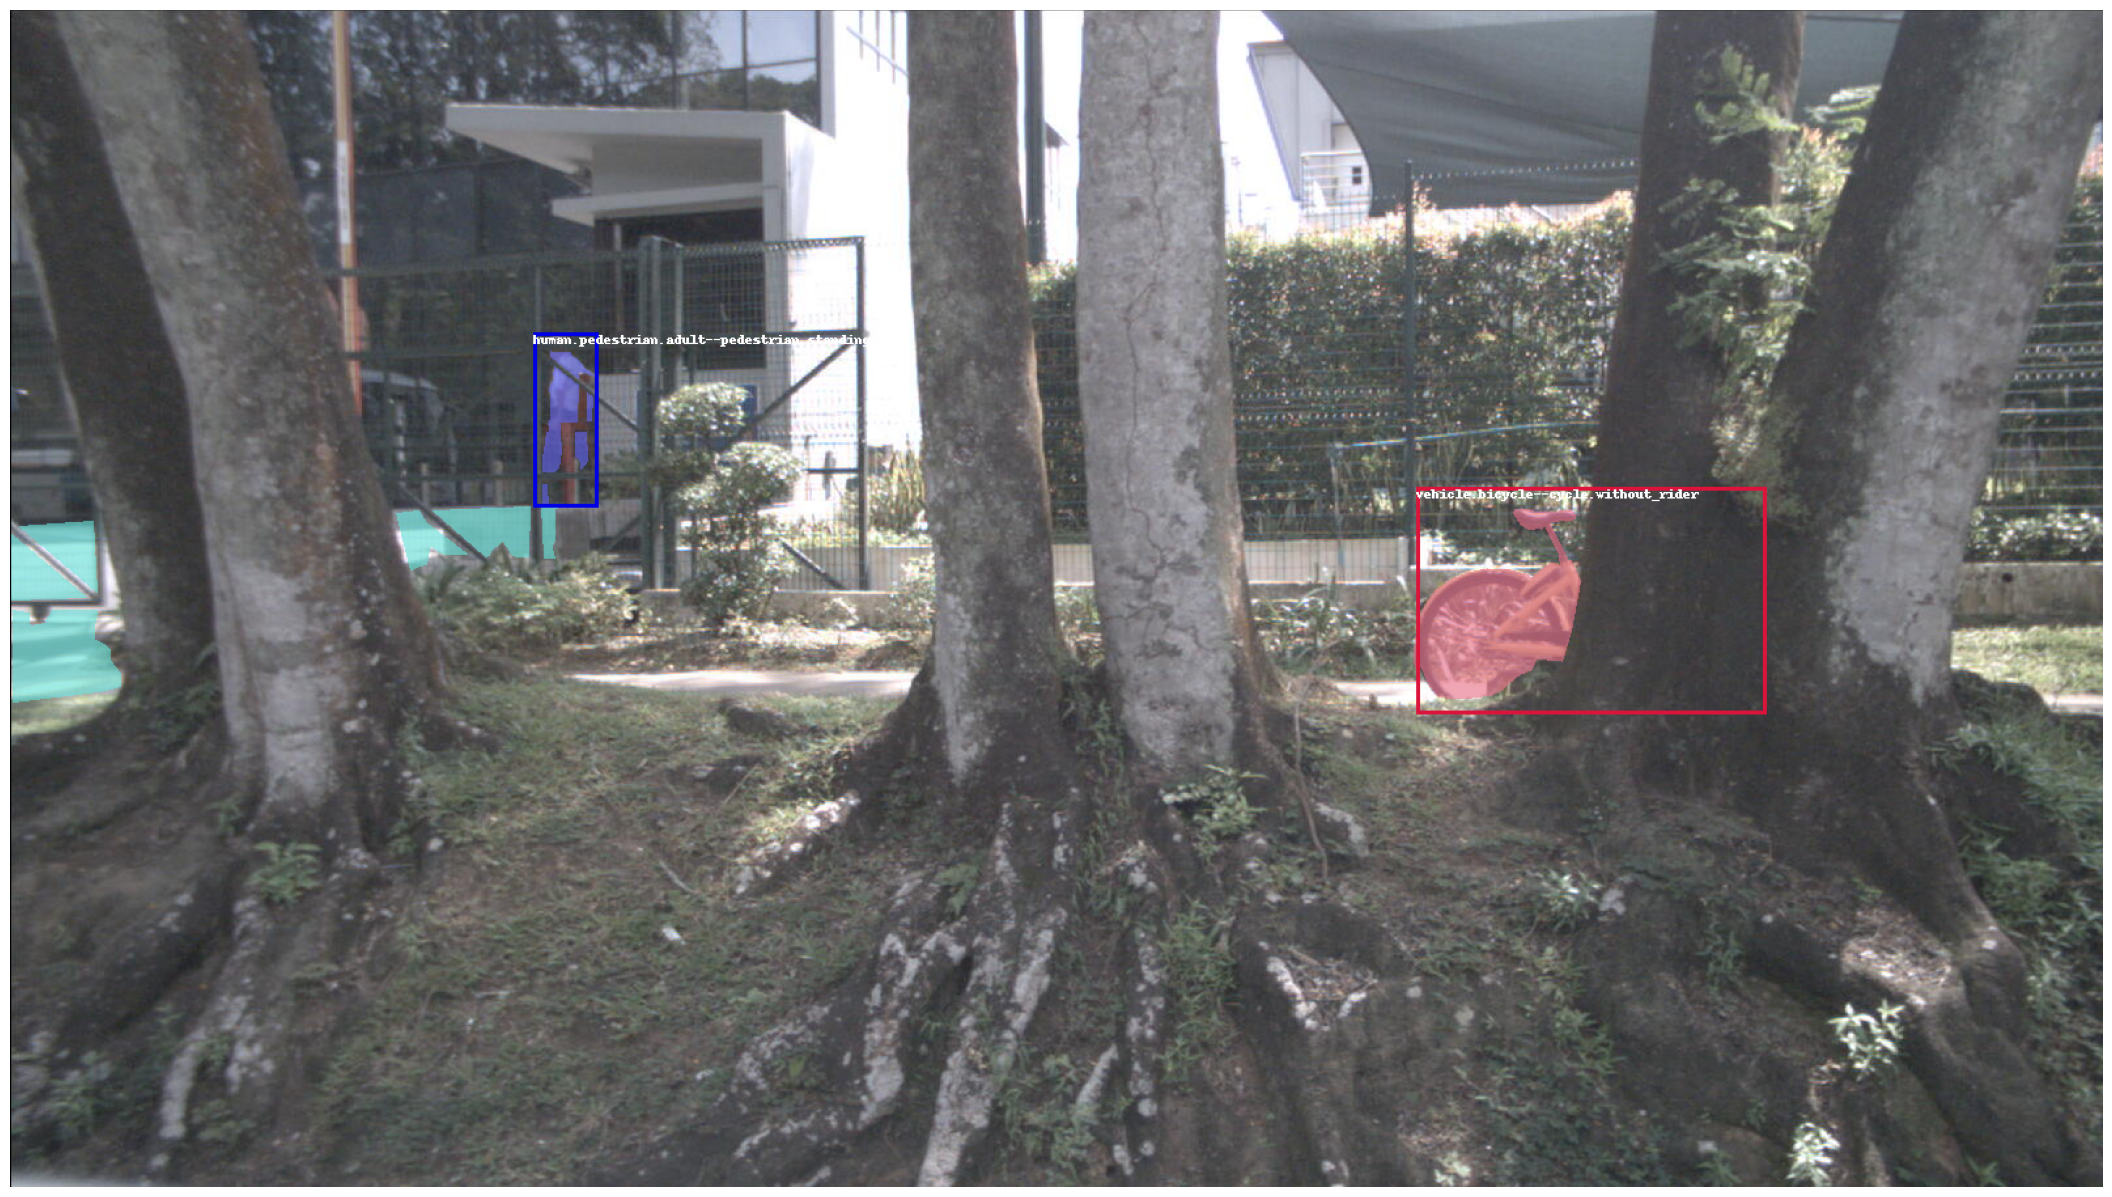

In [25]:
# Visualize the sample
nuim.render_image(detailed_sample['token'], annotation_type='all',
                  with_category=True, with_attributes=True, render_scale=3)

We can see that there are 2 objects in the image. One is a bicycle, another is a pedestrian.

Q: How do we get the bounding boxes?

A: The bounding boxes for various keyframes are stored in `object_ann` table.

In [26]:
# List the annotations
object_tokens, surface_tokens = nuim.list_anns(sample['token'])

Printing object annotations:
1c3ae15d29ce4cad9b24f085e532f8c1 vehicle.bicycle ['cycle.without_rider']
2912333459654a30b87693e09f517738 human.pedestrian.adult ['pedestrian.standing']

Printing surface annotations:
32a8290a7ce65c6288319a96464dfb39 flat.driveable_surface


In [39]:
# Access the annotation for the bicycle
ann_1 = nuim.get('object_ann', object_tokens[0])
ann_1

{'token': '1c3ae15d29ce4cad9b24f085e532f8c1',
 'category_token': 'fc95c87b806f48f8a1faea2dcc2222a4',
 'bbox': [1075, 365, 1342, 538],
 'mask': {'size': [900, 1600],
  'counts': 'WmFfbTA/XmswOkY1TTIxNEw0SzVMNEw1SzRMNE0zTTNMM04yTjJNNE0yTzFOMk4xMDBPMU8xMDBPMk4xMDBPMU8xMDFOMDEwMDBPMTAwTzEwMDAwTzEwME8xMDAwMDAwME8wMTAwMDAwMDAwTzEwTzEwMDAwME8xMU8wMDAwME8xMDBPMTAwTzEwME8xMDBPMU8xTzFPMU8xTzJOMTBjTl1NWVlPYjJmZjBiTVhZT10yaWYwZE1XWU9aMmpmMGhNVFlPVzJtZjBqTVJZT1YybmYwbE1QWU9TMlBnMG9NUFlPbzFSZzBQTm5YT1AyUmcwUU5tWE9vMVNnMFJObFhPbTFVZzBTTmxYT2wxVGcwVU5rWE9qMVZnMFZOa1hPaTFWZzBWTmtYT2kxVWcwV05rWE9oMVZnMFhOaVhPZzFaZzBYTmVYT2cxXWcwWE5kWE9mMV5nMFpOYVhPZTFhZzBbTl5YT2YxYmcwWk5dWE9nMWNnMFpOW1hPZzFlZzBYTlxYT2gxZGcwV05cWE9qMWRnMFZOW1hPazFlZzBXTlhYT2oxaGcwWE5WWE9pMWlnMFlOVFhPaDFsZzBaTlFYT2cxb2cwbU1hV08zPlAyUWgwbU1jV08zOlAyU2gwbU1lV08zNlAyVWgwbU1nV08zM28xVmgwbk1pV08zT28xWGgwbk1rV08zS28xWWgwbk1vV083Q2oxXmgwb01RWE9hMm9nMF9NU1hPYDJsZzBgTVZYT1wybGcwZE1WWE9XMm1nMGpNVFhPUDJQaDBvTVNYT2wxUGgwVE5SWE9nMVFoMFlOb1dPYzFVaDBdTm

These bounding boxes will be the target of our training problem.

# How to interpret the bounding box?

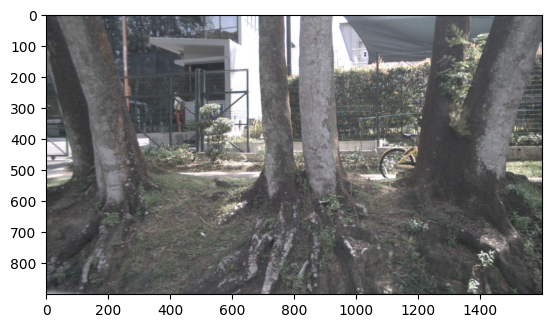

In [45]:
# First, plot the image in matplotlib without annotations
img = plt.imread(f"/data/sets/nuimages/{detailed_sample['filename']}")
fig = plt.imshow(img)
fig

In [41]:
# Our bounding box is in format (xmin, ymin, xmax, ymax)
bbox = ann_1['bbox']
bbox

[1075, 365, 1342, 538]

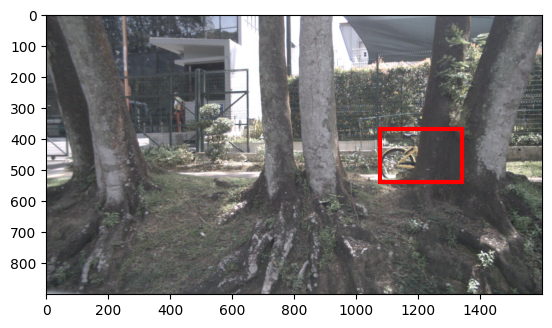

In [50]:
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

"""
The anchor of the bounding box will be, in our example, (1075, 365)
Then, draw the box with according height and width
                +------------------+
                |                  |
              height               |
                |                  |
               (xy)---- width -----+

width = xmax - xmin
height = ymax - ymin
"""
bbox_with = bbox[2] - bbox[0]
bbox_height = bbox[3] - bbox[1]
anchor = (bbox[0], bbox[1])

fig = plt.imshow(img)
fig.axes.add_patch(plt.Rectangle(xy=anchor, width=bbox_with, height=bbox_height,
                                 fill=False, color='red', linewidth=3))